# Ejercicio 1

 Generamos un conjunto de datos

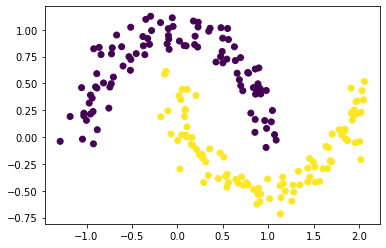

In [25]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

C1, C2 = make_moons(random_state = 123, n_samples=200, noise=0.1)
plt.scatter(C1[:,0], C1[:,1], c = C2)
plt.show()

Implementamos regresión logística usando el descenso gradiente  para clasificar a $C_1$ y $C_2$. 

In [36]:
import numpy as np

'''
La función sigmoide es de la forma S(z) = 1/(1 + e^{-z}), donde 
z = x * w^{T} + b. 
'''
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

def de_coste(y, y_hat):
    j = - (y.dot(np.log(y_hat)) + (1 - y).dot((np.log(1 - y_hat))))
    return j

def descenso_gradiente(x, y, alpha, theta, num_iteraciones):
    costos = []
    for each_iter in range (num_iteraciones):
        z = np.dot(x, theta[1:]) + theta[0]
        y_hat = sigmoide(z)
        error = y_hat - y
        gradiente = x.T.dot(error)
        theta[0] -= alpha * error.sum()
        theta[1:] -= alpha * gradiente
        costos.append((1 / num_iteraciones) * (de_coste(y, y_hat)))
    return costos

def prediccion(data):
    z = np.dot(data, theta[1:]) + theta[0]
    return np.where(sigmoide(z)>= 0.5, 0, 1)

Asignando valores a $\theta$, $\alpha$ y al número de iteraciones, obtenemos

Intersección: 0.5851130757279867
Coeficientes estimados: [ 1.15685167 -4.83685975]


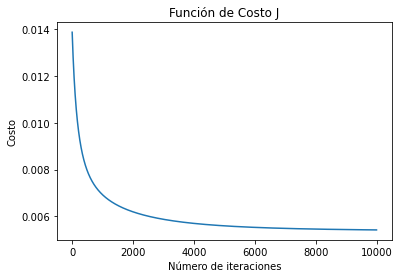

In [38]:
k, l = C1.shape
theta = np.zeros(l+1)
costo = descenso_gradiente(C1, C2, 0.0001, theta, 10000)

print ('Intersección:', theta[0])
print ('Coeficientes estimados:', theta[1:])

# Visualizamos la función de costo.
plt.title('Función de Costo J')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.plot(costo)
plt.show()

Finalmente, la clasificación quedaría de la siguiente forma:

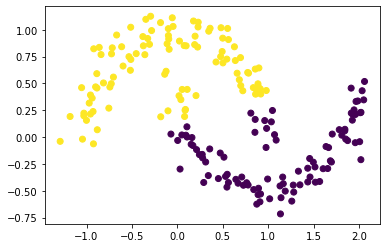

In [40]:
plt.scatter(C1[:,0], C1[:,1], c = prediccion(C1))
plt.show()

Utilizando **sklearn** para comparar el resultados obtenemos

Intersección:  [0.36023346]
Coeficientes estimados:  [[ 1.09045248 -3.69780292]]


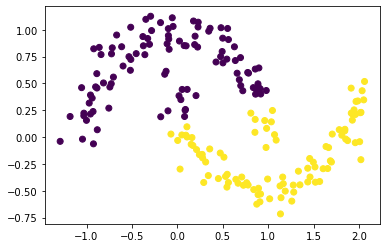

In [41]:
from sklearn.linear_model import LogisticRegression

regresion_logistica = LogisticRegression()
modelo = regresion_logistica.fit(C1, C2)

print ("Intersección: ", modelo.intercept_)
print ("Coeficientes estimados: ", modelo.coef_)

# Visualizamos la clasificación.
plt.scatter(C1[:,0], C1[:,1], c = regresion_logistica.predict(C1))
plt.show()